# Exercise 4 - Template matching

## Load libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load the signals and the templates

(200000, 1)
(40, 12)


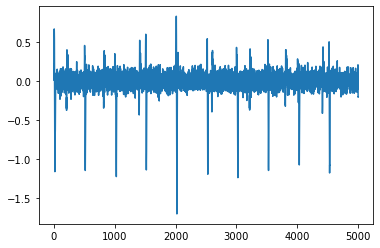

In [2]:
# Load signal
signal = pd.read_csv('../signals/E04_signal.csv').values

# Load the template matrix
templates = pd.read_csv('../signals/E04_templates.csv').values

print(signal.shape)
print(templates.shape)

plt.figure()
plt.plot(signal[10000:15000])
plt.show()


## Select relevant templates

From a visual inspection of the templates, select three shapes that are most useful for the detection of the spikes from the signals

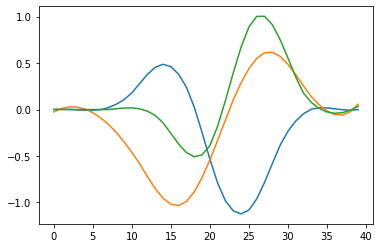

In [3]:
template_subset = templates[:,[0,8,5]]
plt.figure()
plt.plot(template_subset)
plt.show()

## Template based spike detection

Use the three relevant templates to carry out three different spike detection procedure. In this way, the three outputs correspond to the spiking instants of three different neurons. Check whether there is ambiguity in the detection of the different neurons (i.e. if the same instant is assigned to two different neurons)

In [4]:
from scipy.signal import correlate, find_peaks

correlation_all = []
for t in range(template_subset.shape[1]):
    tt = template_subset[:,t]
    correlation_all.append(correlate(signal.reshape(-1,1), tt.reshape(-1,1), mode='same'))
correlation_all = np.asarray(correlation_all).squeeze().transpose()

pks = []
for c in range(correlation_all.shape[1]):
    pks.append(find_peaks(correlation_all[:,c].squeeze(), 
    height=0.5*np.max(correlation_all[:,c]),
    distance=30
    )[0])

from itertools import combinations

n_ambiguous = []
for c in combinations(range(len(pks)),2):
    n_ambiguous.append([c[0], c[1],
    np.sum([x in pks[c[1]] for x in pks[c[0]]]) # First two elements are the template indexes, third element is the number of ambiguous spikes
    ])
print(n_ambiguous)

[[0, 1, 0], [0, 2, 0], [1, 2, 3]]


## Threshold based spike detection

Over the same signal, carry out a threshold based spike detection, and segment all the identified spikes

(2068, 60)


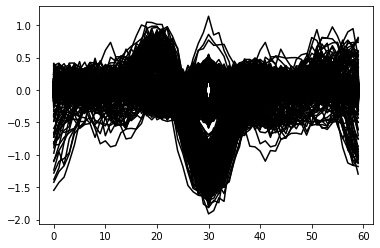

In [8]:
locs_ths = find_peaks(np.abs(signal).squeeze(),
    height=0.1*np.max(np.abs(signal)), # Threshold is very low for this signal
    distance=30
    )[0]

spike_matrix = []
for l in locs_ths:
    spike_matrix.append(signal[l-30:l+30])
spike_matrix = np.asarray(spike_matrix).squeeze()
print(spike_matrix.shape)

plt.figure()
plt.plot(spike_matrix.transpose(), 'k')
plt.show()

# Calculate the distance with the templates

For each of the identified spikes, calculate the distance with all the templates that have been provided.

<span style="color:red; font-weight:bold">Note</span> Check the spike-template alignment

In [9]:
d = []

templates_set = templates[:,[10,1,5]]

for t in range(templates_set.shape[1]):
    tt = templates_set[:,t]
    d_tmp = []
    for p in locs_ths:
        d_tmp.append(
            np.sqrt(np.sum(
                (tt - signal[p-30:p+30])**2
            ))/60
        )
    d.append(d_tmp)

d = np.asarray(d).transpose()
print(d[:10])

[[0.17511913 0.16645992 0.33259418]
 [0.17683069 0.16623375 0.33104215]
 [0.17527662 0.16674305 0.33281887]
 [0.1771462  0.16816605 0.33314879]
 [0.17801239 0.16844095 0.33283267]
 [0.17807684 0.16895195 0.33340751]
 [0.35906729 0.36336829 0.47274915]
 [0.17315523 0.16430057 0.33145443]
 [0.21844585 0.20724436 0.35115414]
 [0.17460469 0.16797912 0.33480788]]


## Template-based spike sorting

For each of the spikes, assign it to the one with the lowest distance. How many different neurons can you identify. After this step, compare results with the ones coming from the template-based detection

<span style="color:red; font-weight:bold">Note</span> if the results are ambiguous, select a smaller set of templates

In [10]:
indexes = [np.argmin(d[i,:]) for i in range(d.shape[0])]
print(np.unique(indexes))

[0 1]
